# Number Recognition using Keras and CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation

In [2]:
# Getting Data from Keras Database
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


# To use Keras we need 4 dimmensional array

In [3]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [4]:
#Used Later
input_shape = (28, 28, 1)

# Starting the Model

In [5]:
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model.add(Conv2D(56, kernel_size=(3,3)))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))




model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 28)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 56)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1400)              0

In [8]:
history = model.fit(x=X_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.1523 - accuracy: 0.9525
Epoch 2/10
60000/60000 [==============================] - 20s 334us/sample - loss: 0.0533 - accuracy: 0.9831
Epoch 3/10
60000/60000 [==============================] - 21s 348us/sample - loss: 0.0373 - accuracy: 0.9885
Epoch 4/10
60000/60000 [==============================] - 21s 349us/sample - loss: 0.0284 - accuracy: 0.9908
Epoch 5/10
60000/60000 [==============================] - 21s 348us/sample - loss: 0.0231 - accuracy: 0.9926
Epoch 6/10
60000/60000 [==============================] - 21s 344us/sample - loss: 0.0174 - accuracy: 0.9946
Epoch 7/10
60000/60000 [==============================] - 21s 354us/sample - loss: 0.0153 - accuracy: 0.9949
Epoch 8/10
60000/60000 [==============================] - 21s 353us/sample - loss: 0.0124 - accuracy: 0.9959
Epoch 9/10
60000/60000 [==============================] - 22s 360us/sample - loss: 0.0107 - accuracy: 0.9

In [9]:
score = model.evaluate(X_test, y_test,verbose=1)

10000/10000 [==============================] - 1s 122us/sample - loss: 0.0295 - accuracy: 0.9920


# Saving Model

In [10]:
model.save("Data/model.h5")

Text(0.5, 0, 'epoch')

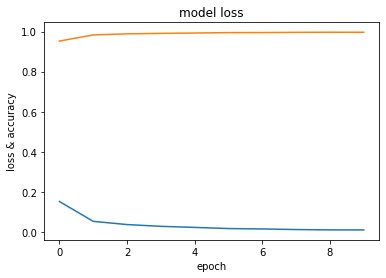

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss & accuracy')
plt.xlabel('epoch')

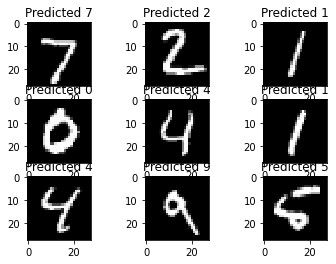

In [12]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray', interpolation='none')
    pred = model.predict(X_test[i].reshape(1, 28, 28, 1))
    plt.title("Predicted {}".format(pred.argmax()))

# Testing with Drawn Pictures

In [13]:
import cv2

In [14]:
img = cv2.imread("Data/Pic/5.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
img = np.array([cv2.resize(img,(28,28))])

In [15]:
print(img.shape)

(1, 28, 28)


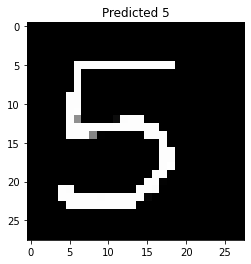

In [16]:
plt.imshow(img.reshape(28,28), cmap='gray', interpolation='none')
pred = model.predict(img.reshape(1, 28, 28, 1))
plt.title("Predicted {}".format(pred.argmax()))
plt.show()